# (Interactive) Plotting using Matplotlib and Seaborn

[Matplotlib](http://matplotlib.org) is a basic plotting library for Python inspired by Matlab. [Seaborn](http://stanford.edu/~mwaskom/software/seaborn) is built on top of it with integrated analysis, specialized plots, and pretty good integration with Pandas.

Also see [the full gallery of Seaborn](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html) or [Matplotlib](http://matplotlib.org/gallery.html).


In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
#use a standard dataset of heterogenous data
cars = pd.read_csv('data/mtcars.csv')
cars.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Scatterplot

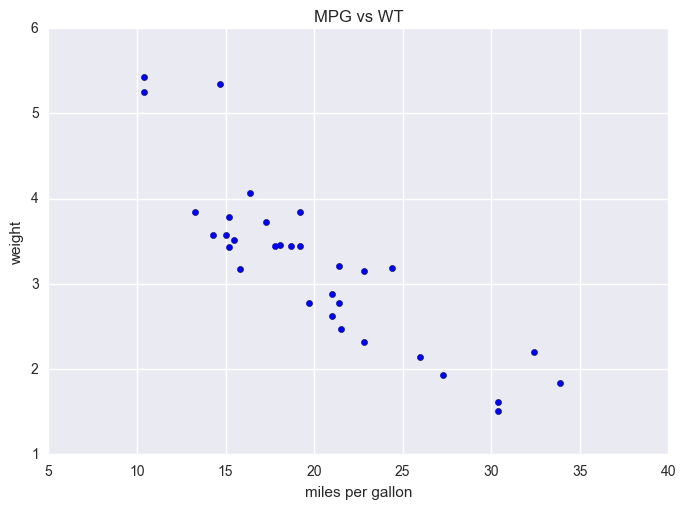

In [3]:
plt.scatter(x=cars['mpg'],y=cars['wt'])
plt.xlabel('miles per gallon')
plt.ylabel('weight')
plt.title('MPG vs WT')
plt.show()

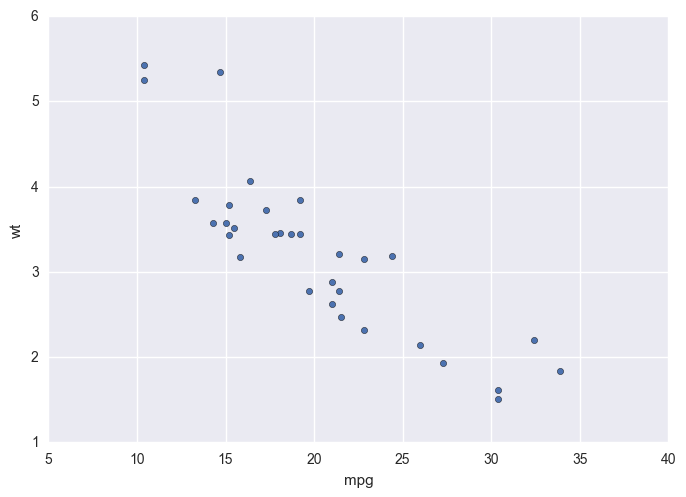

In [4]:
#integrated in pandas, too
cars.plot(x='mpg',y='wt',kind='scatter')

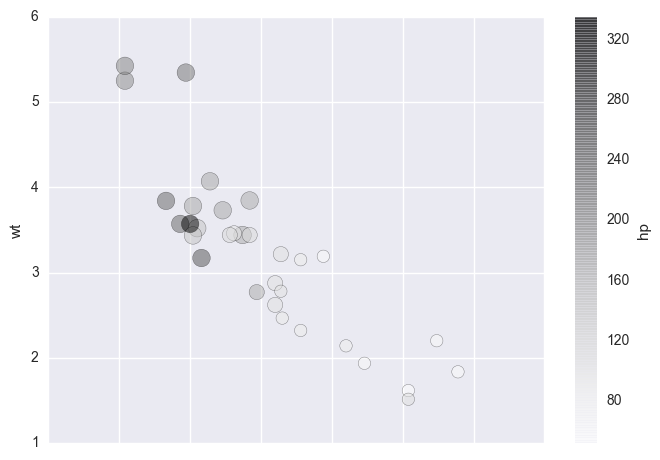

In [5]:
cars.plot(kind='scatter', x='mpg',y='wt',c='hp',s=cars['cyl']*20,alpha=0.5)

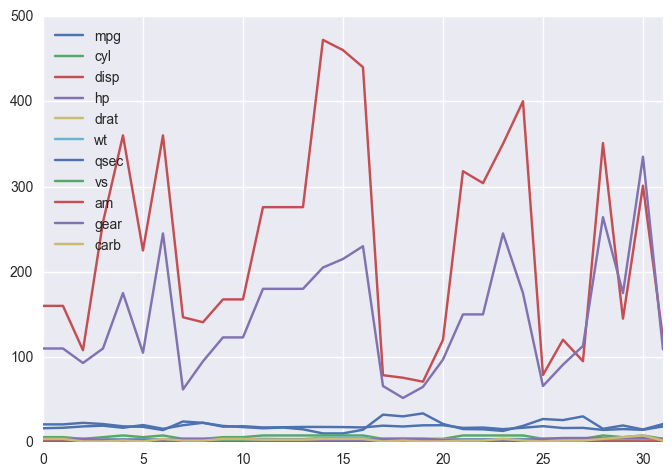

In [6]:
#what if we plot everything?
cars.plot()

## Histogram

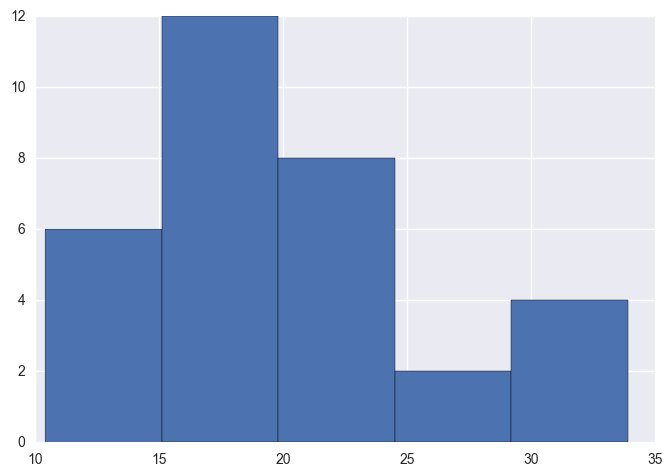

In [7]:
cars['mpg'].hist(bins=5)

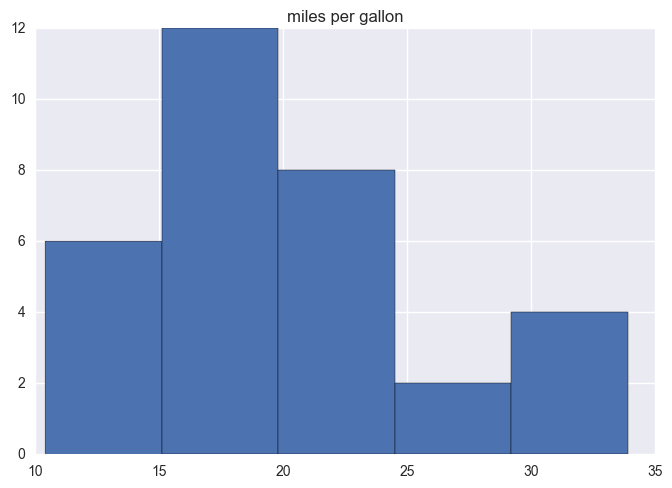

In [8]:
plt.hist(cars['mpg'],bins=5)
plt.title('miles per gallon')

/Users/marcstreit/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


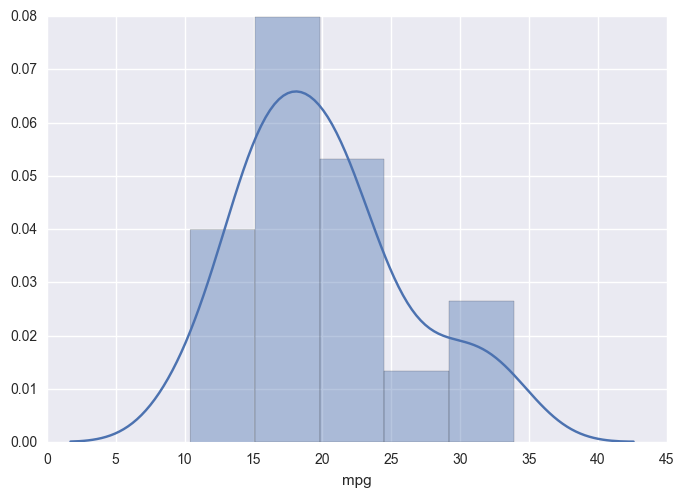

In [9]:
#seaborn not just a histogram but also an kernel density enstimation and better default settings
sns.distplot(cars['mpg'],bins=5)

# Box plots

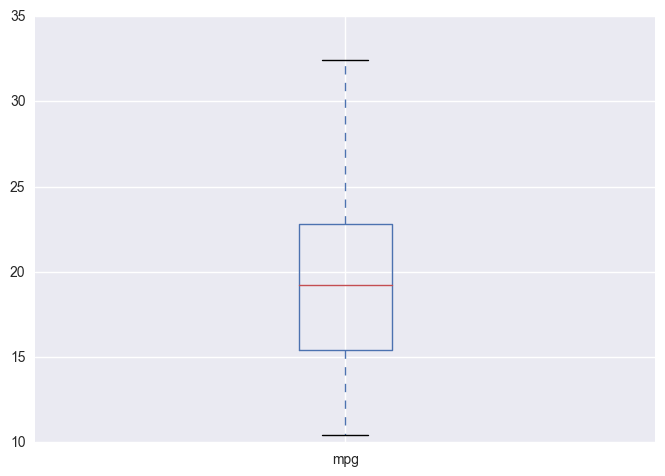

In [10]:
#box plots
cars['mpg'].plot(kind='box')

{'boxes': [<matplotlib.lines.Line2D at 0x11acee160>],
 'caps': [<matplotlib.lines.Line2D at 0x11acf3b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ae04dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11ae04588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11aceea58>,
  <matplotlib.lines.Line2D at 0x11aceec18>]}

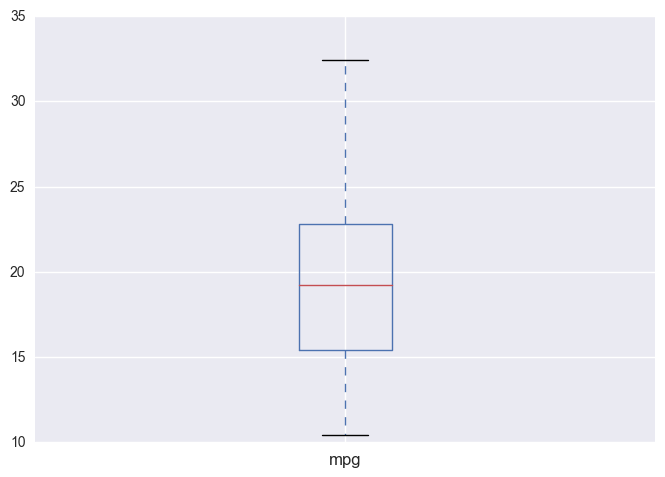

In [11]:
cars.boxplot('mpg')

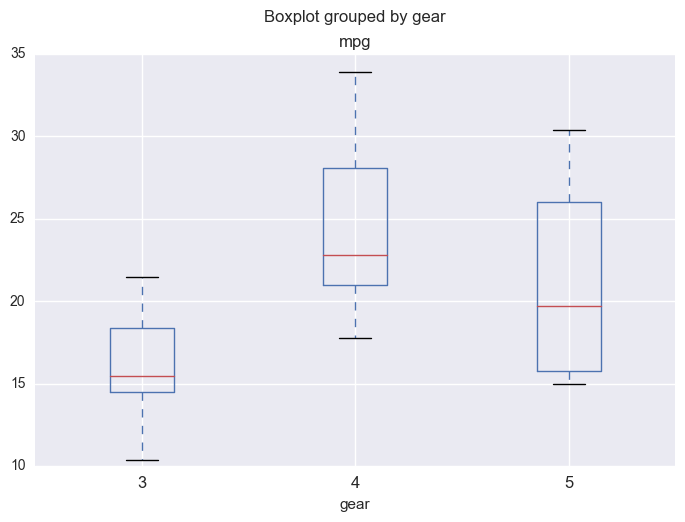

In [12]:
#group by gear
cars.boxplot('mpg', by='gear')

In [13]:
# load gapminder again and select 2007
gap = pd.read_csv('data/gapminder-unfiltered.tsv',index_col=0, sep='\t')
gap2007 = gap[gap.year == 2007]
gap2007.columns

Index(['continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

## Log scale

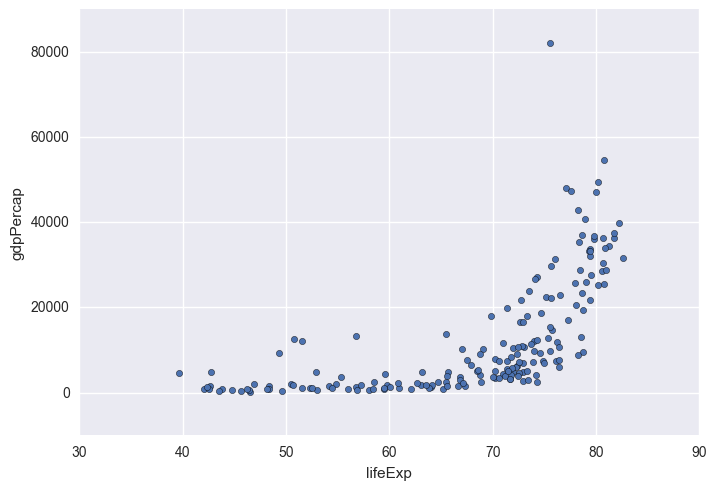

In [14]:
gap2007.plot(kind='scatter', x='lifeExp',y='gdpPercap')

unbalanced with outliers what about log scale?

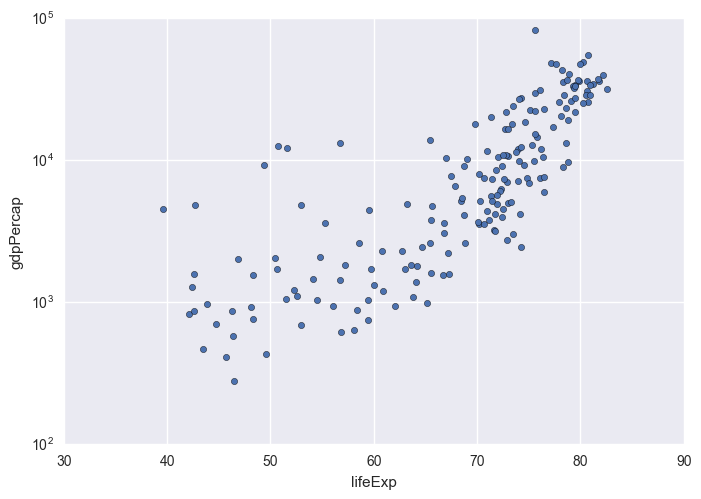

In [15]:
gap2007.plot(kind='scatter', x='lifeExp',y='gdpPercap')
plt.yscale('log')

## Grouping / coloring plots

How to group by color?

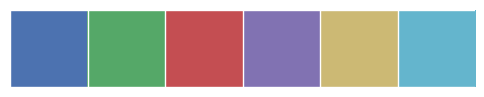

In [16]:
#create a color palette
colors = sns.color_palette()
sns.palplot(colors)

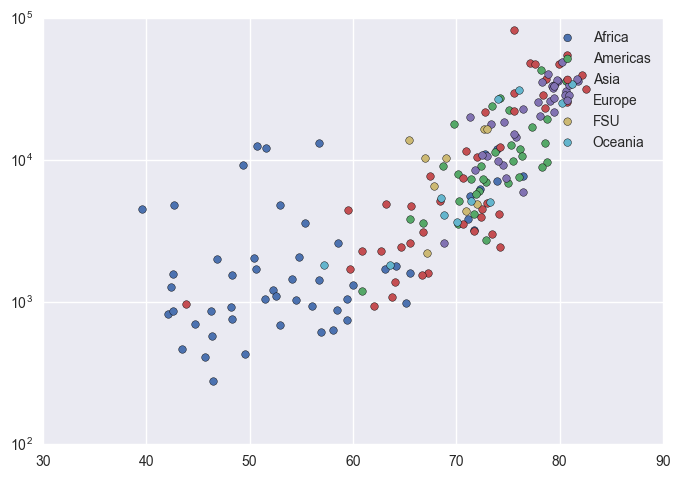

In [17]:
#for each group create an own plot an overlay them
for (name, group),color in zip(gap2007.groupby('continent'),colors):
    plt.scatter(x=group['lifeExp'],y=group['gdpPercap'],label=name, c=color,s=30)
plt.yscale('log')
plt.legend()

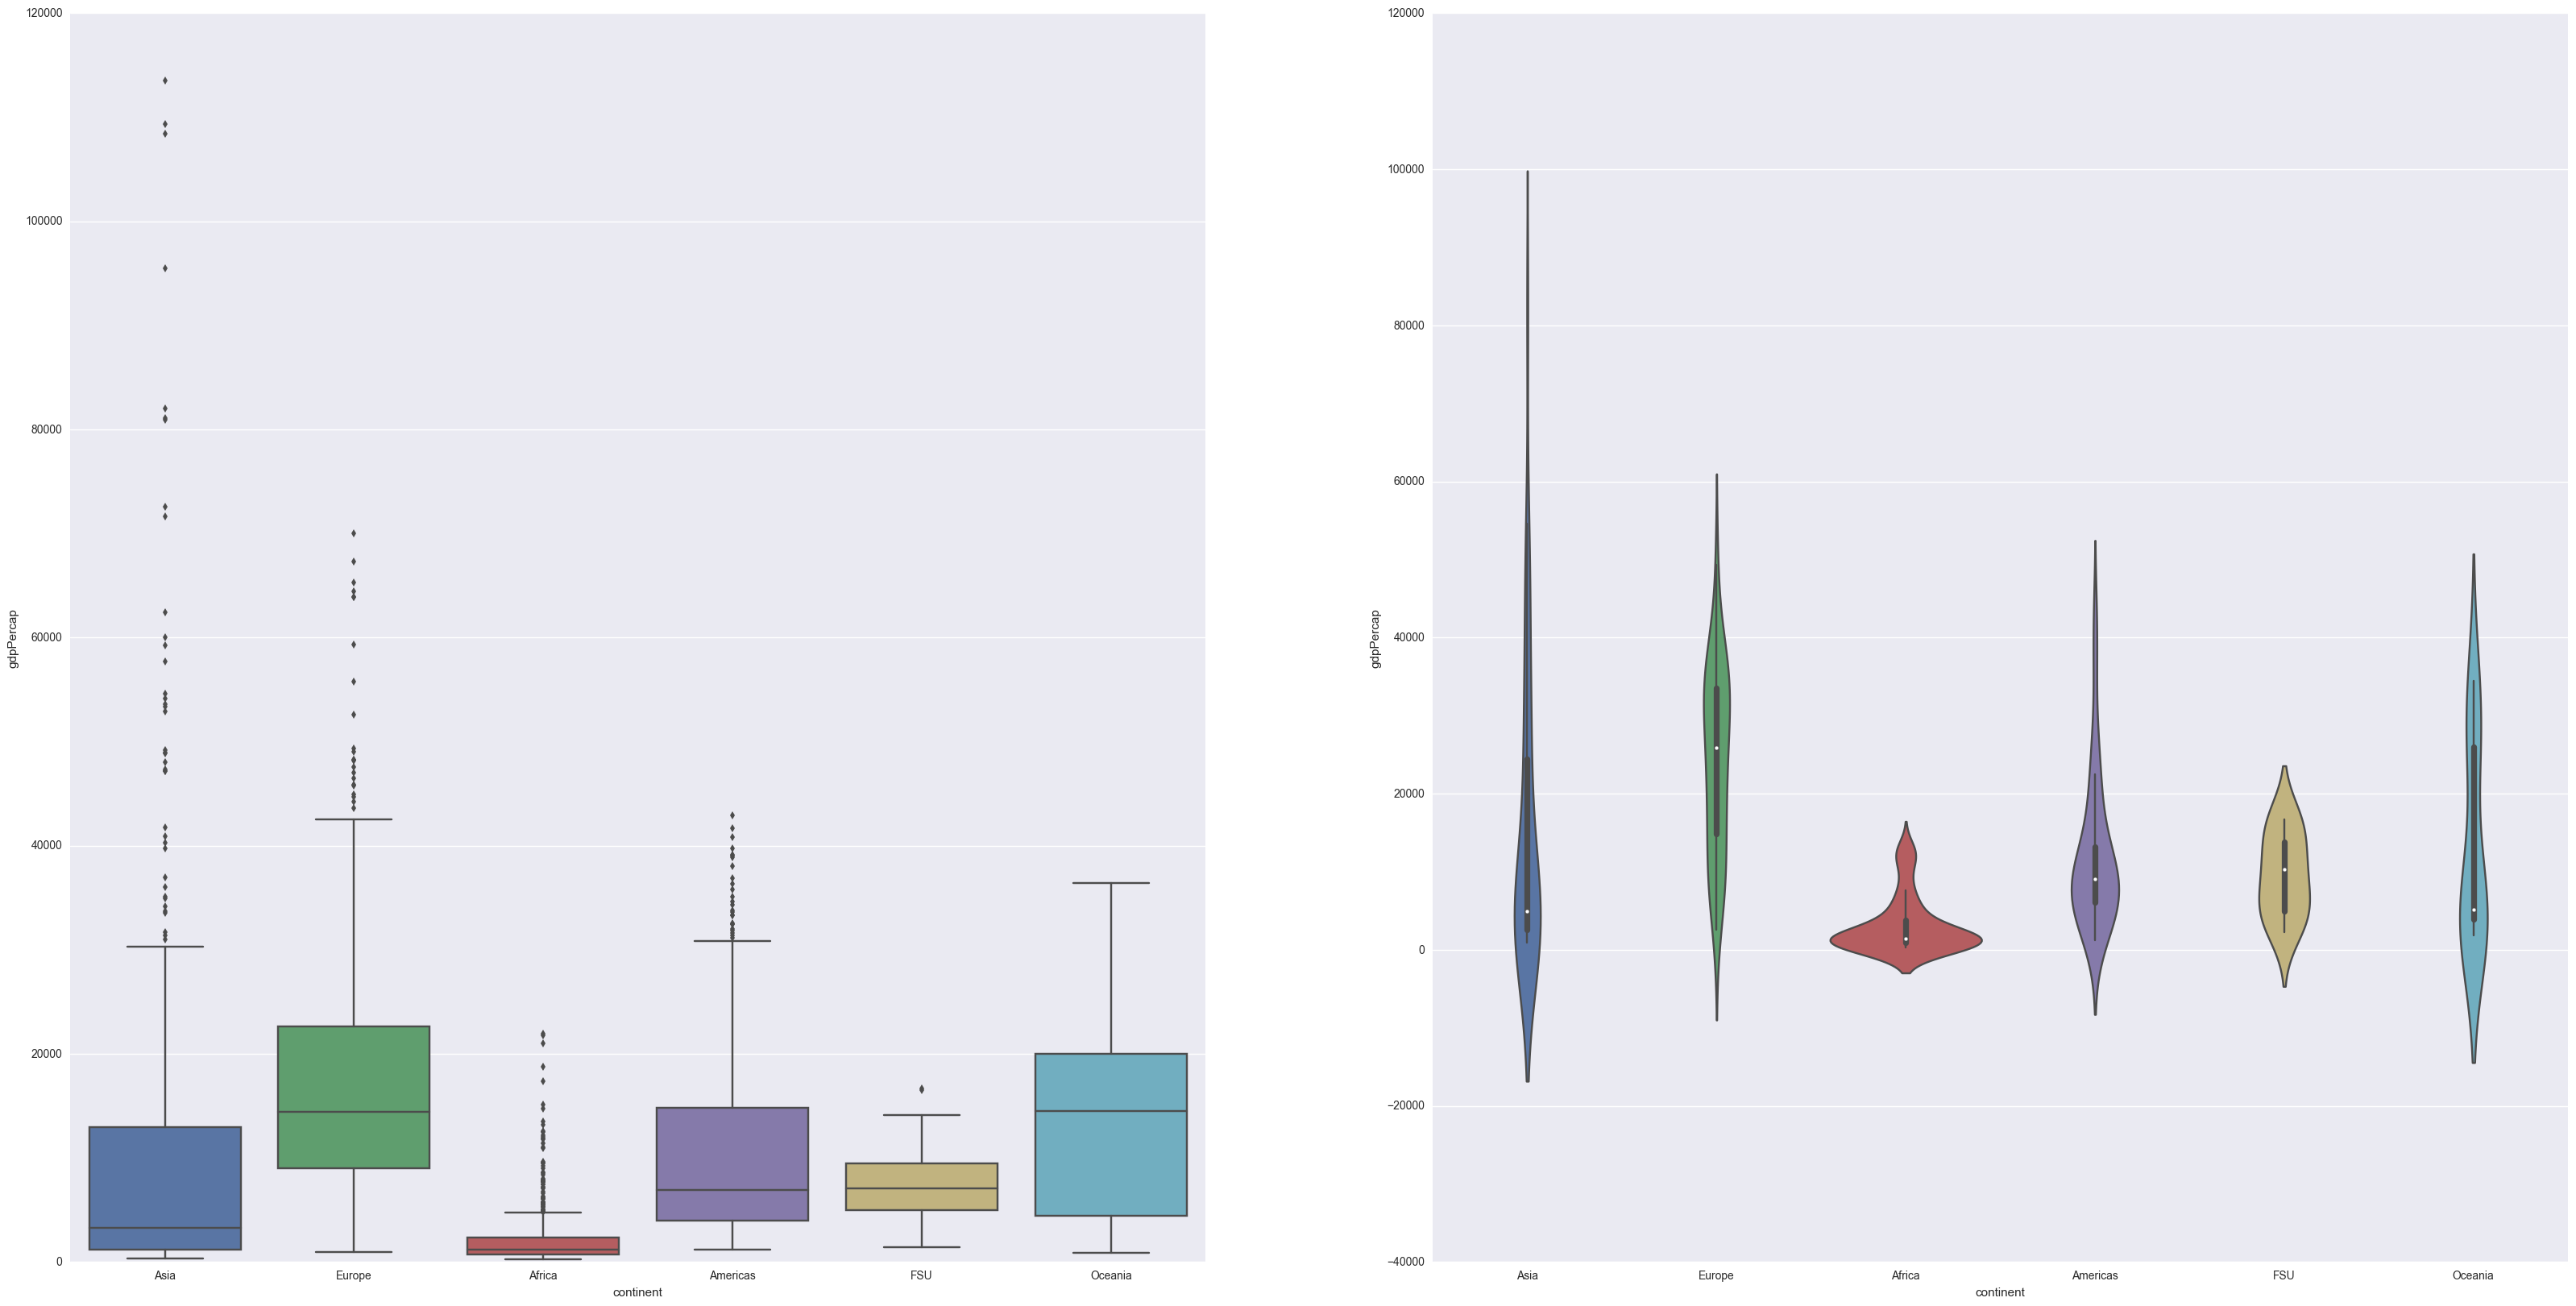

In [18]:
#playing with categories ... seaborn is pretty good with it
plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='continent',y='gdpPercap',data=gap)

plt.subplot(122)
sns.violinplot(x='continent',y='gdpPercap',data=gap2007)

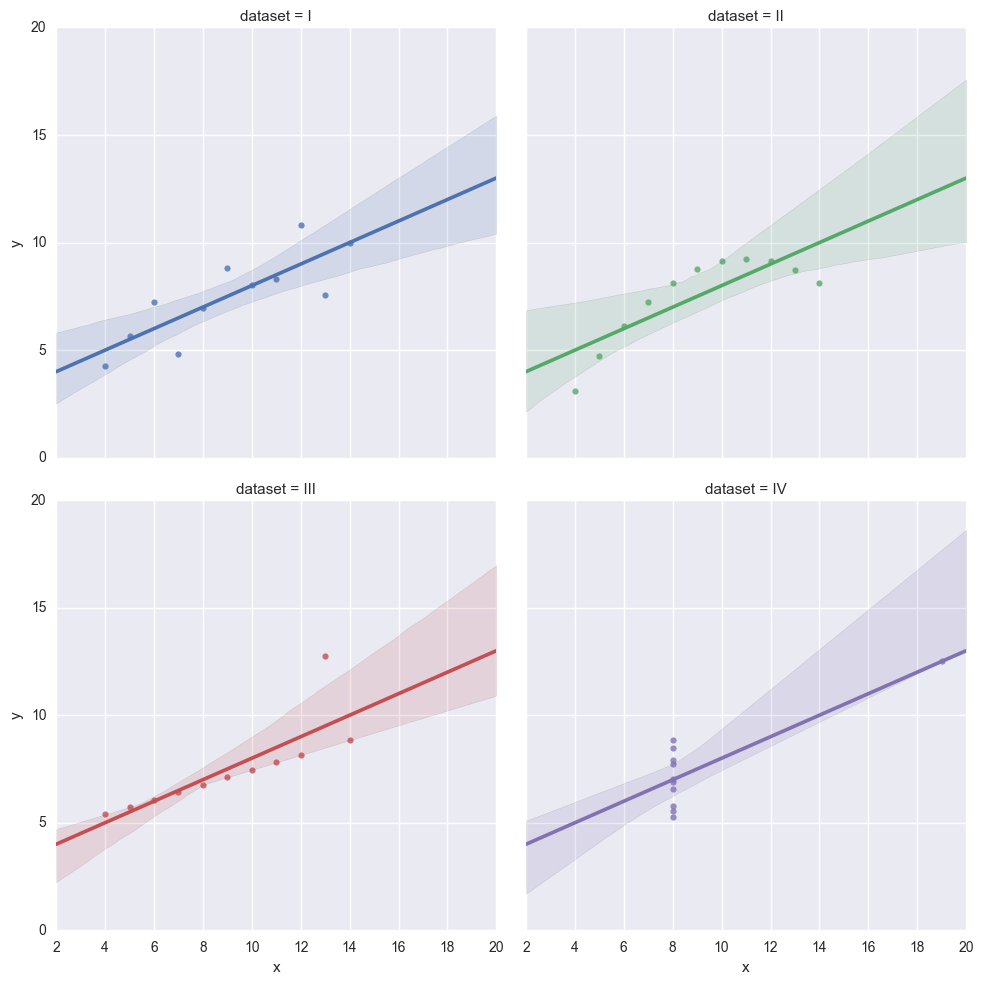

In [19]:
# or with linear regression

anscombe = sns.load_dataset("anscombe")
sns.lmplot('x','y',col='dataset',hue='dataset', data=anscombe, col_wrap=2)
#g = sns.FacetGrid(anscombe, col="dataset", size=4, aspect=1)
#g.map(sns.regplot, "x", "y")

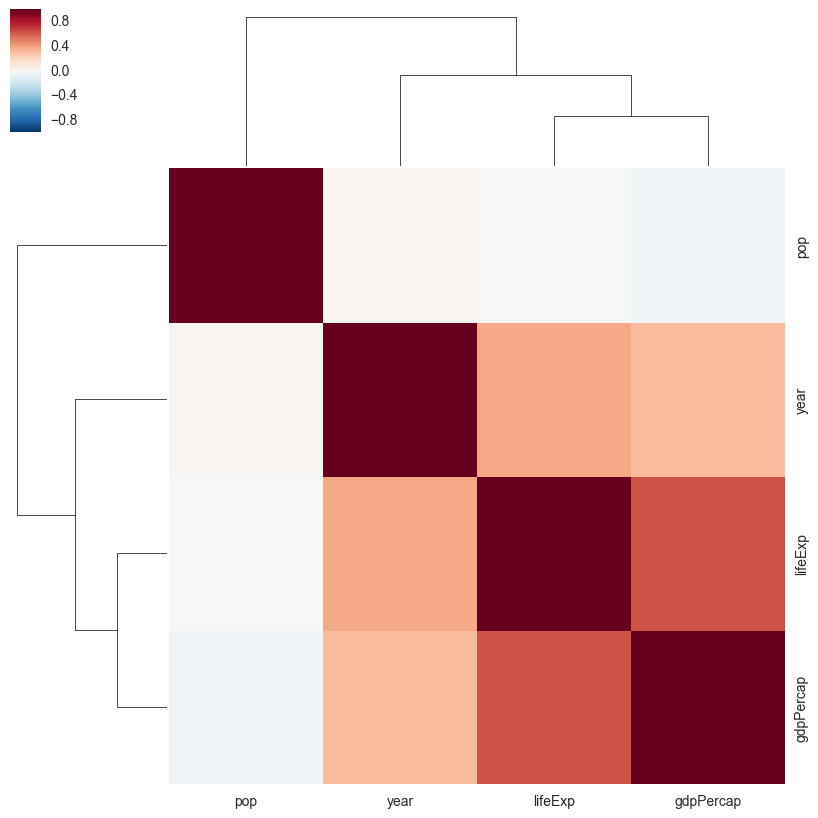

In [20]:
# or with structured heatmaps

#compute the correlations and take a look at them
corrmat = gap.corr()

# draw a clustered heatmap using seaborn
sns.clustermap(corrmat, square=True)

## TASK
> Create a scatterplot where 
> * x = lifeExp 
> * y = gdpPerCap
> * color = continent
> * size = pop
>
> Label the axis appropiately and use a log scale for gdp.

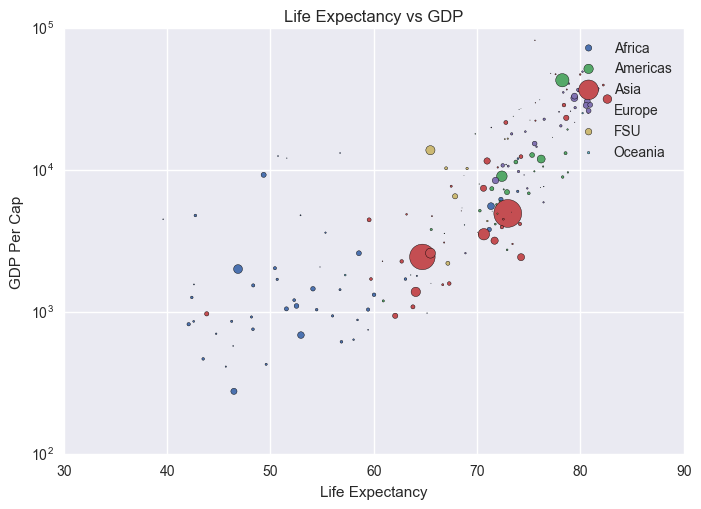

In [21]:
#for each group create an own plot an overlay them
pop_max = gap2007['pop'].max()
for (name, group),color in zip(gap2007.groupby('continent'),colors):
    plt.scatter(x=group['lifeExp'],y=group['gdpPercap'],label=name, c=color,s=(group['pop']/pop_max)*400)
plt.yscale('log')
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP Per Cap')
plt.legend()

## Interactive plots

Simple interaction is possible with IPython by default. That means whenever the user changes some parameter the visualization is recreated on the server-side and sent to the client. 

In [22]:
from IPython.html.widgets import interact, interact_manual

/Users/marcstreit/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [23]:
@interact(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

Hello 50 True red


In [24]:
@interact_manual(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

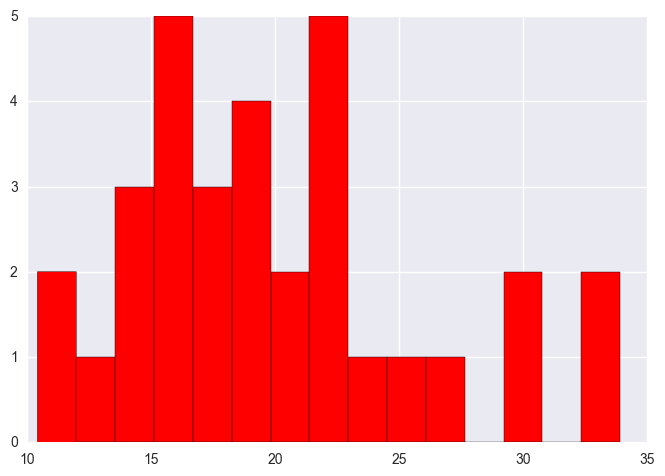

In [25]:
@interact(bins=(5, 25, 5),color=['red','green','orange','blue'])
def show_distplot(bins,color):
    cars['mpg'].hist(bins=bins, color=color)

# Custom-built widgets

http://nbviewer.ipython.org/github/ipython/ipython/blob/3.x/examples/Interactive%20Widgets/Widget%20List.ipynb 

In [26]:
from IPython.html import widgets

[widget for widget in dir(widgets) if not widget.endswith('Widget') and widget[0] == widget[0].upper() and widget[0] != '_']

['Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'ColorPicker',
 'Controller',
 'Dropdown',
 'EventfulDict',
 'EventfulList',
 'FlexBox',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Label',
 'Latex',
 'Layout',
 'Output',
 'PlaceProxy',
 'Play',
 'Proxy',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionSlider',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'VBox',
 'Valid']

/Users/marcstreit/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/marcstreit/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


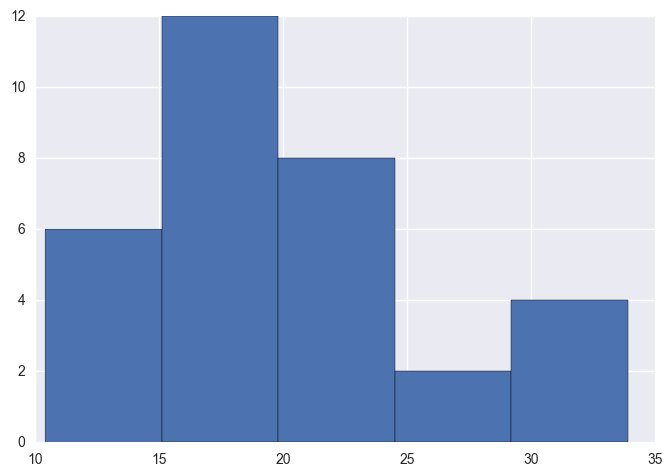

In [27]:
@interact(bins=widgets.FloatText(value=5))
def show_distplot(bins):
    cars['mpg'].hist(bins=bins)

In [28]:
text_widget = widgets.Textarea(value='Hello', description='text area')
slider_widget = widgets.BoundedFloatText(5,min=0,max=10, description='slider area')
check_widget = widgets.Checkbox(True,description="CheckboxWidget")
toggle = widgets.RadioButtons(options=['red','green','blue'], description="RadioButtonsWidget")

@interact(text=text_widget, slider=slider_widget,check=check_widget,categories=toggle)
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

Hello 50.0 True red


In [29]:
b = widgets.Button(description="Update")
checkbox = widgets.Checkbox(description="CheckboxWidget")

tab1_children = [b,
                 checkbox,
                 widgets.Dropdown(options=['A','B'], description="DropdownWidget"),
                 widgets.RadioButtons(options=['A','B'], description="RadioButtonsWidget"),
                 widgets.Select(options=['A','B'], description="SelectWidget"),
                 widgets.Text(description="TextWidget"),
                 widgets.Textarea(description="TextareaWidget"),
                 widgets.ToggleButton(description="ToggleButtonWidget"),
                 widgets.ToggleButtons(options=["Value 1", "Value2"], description="ToggleButtonsWidget"),
                 ]

tab2_children = [widgets.BoundedFloatText(description="BoundedFloatTextWidget"),
                 widgets.BoundedIntText(description="BoundedIntTextWidget"),
                 widgets.FloatSlider(description="FloatSliderWidget"),
                 widgets.FloatText(description="FloatTextWidget"),
                 widgets.IntSlider(description="IntSliderWidget"),
                 widgets.IntText(description="IntTextWidget"),
                 ]

tab1 = widgets.Box(children=tab1_children)
tab2 = widgets.Box(children=tab2_children)


i = widgets.Accordion(children=[tab1, tab2])

i.set_title(0,"Basic Widgets")
i.set_title(1,"Numbers Input")

from IPython.display import display

def button_clicked(bb):
    print(checkbox.value)
    #TODO update plot

b.on_click(button_clicked)

display(i)

## TASK
> Convert the static plot from before into an interactive one where you can slide through the year.

## Next

[Machine Learning using Scikit Learn](04_MachineLearning.ipynb)